Numpy 的基本使用

Matlab = Numpy + Scipy + Matplotlib
SciPy 是一个开源的 Python 算法库和数学工具包。




In [ ]:
# install 
#!pip3 install numpy

Numpy 的基本语法：处理数组的语法
一维数组： 文字
二维数组： 图像，语音
三维数据： 视频，图网络


Numpy 很重要， 基本上和 Pytorch 的 Tensor 语法是一致的。 Tensor 是 Numpy 的GPU 版本 （非官方解释）

In [ ]:
import numpy as np
a = np.array([1,2,3], dtype='int32')
print(a)

In [ ]:
b = np.array([[9.0,8.0,7.0],[6.0,5.0,4.0]])
print(b)

In [ ]:
# Get Dimension
a.ndim
b.ndim

In [ ]:
b.shape

In [ ]:
a.dtype

In [ ]:
b.itemsize

### Accessing/Changing specific elements, rows, columns, etc

In [ ]:
a = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])
print(a)
print(a.shape)

In [ ]:
# Get a specific element [r, c]
a[1, 5]

In [ ]:
# Get a specific row 
a[0, :]

In [ ]:
# Get a specific column
a[:, 2]

In [ ]:
# Getting a little more fancy [startindex:endindex:stepsize]
b = a[0, 0:-1:2]
print(b)

## 3-dimensions

In [ ]:
b = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(b)

In [ ]:
print(b.shape)

In [ ]:
# Get specific element
b[0,1,1]

In [ ]:
# replace 
b[:,1,:] = [[9,9],[8,8]]
b

##### Linear Algebra

In [ ]:
a = np.ones((2,3))
print(a)

b = np.full((3,2), 2)
print(b)

np.matmul(a,b)

## Reference docs (https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

# Determinant
# Tracea
# Singular Vector Decomposition
# Eigenvalues
# Matrix Norm
# Inverse
# Etc...

In [ ]:
stats = np.array([[1,2,3],[4,5,6]])
stats

In [ ]:
np.min(stats)

In [ ]:
np.max(stats, axis=1)

### Reorganizing Arrays


In [ ]:
## Numpy array 存储是一维的， 表现是多维的
before = np.array([[1,2,3,4],[5,6,7,8]])
print(before)

after = before.reshape((4,2))
print(after)

In [ ]:
# Vertically stacking vectors
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])

v3 = np.vstack([v1,v2,v1,v2])
print(v3)

In [ ]:
# Horizontal  stack
h1 = np.ones((2,4))
h2 = np.zeros((2,2))

np.hstack((h1,h2))

Sklearn 使用

MNIST 的 使用

In [ ]:
!pip3 install -U scikit-learn


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # 多层感知机分类器
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 加载手写数字数据集（1797张8x8像素的数字图片）
digits = load_digits()
X = digits.data  # 特征：64维向量（每张图片8x8像素）
y = digits.target  # 标签：0-9的数字

# 可视化前10张图片
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# 加载加利福尼亚房价数据集
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# 转换为DataFrame便于查看
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target  # 中位数房价（目标变量）

print("数据基本信息：")
df.info()

# 查看数据集行数和列数
rows, columns = df.shape

if rows < 1000:
    # 小数据集（行数少于1000）查看全量统计信息
    print("数据全部内容统计信息：")
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    # 大数据集查看数据前几行信息
    print("数据前几行内容统计信息：")
    print(df.head().to_csv(sep='\t', na_rep='nan'))

In [ ]:
# 特征和目标变量
X = housing.data
y = housing.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(type(X_test_scaled))

In [ ]:
# 定义要比较的模型
models = {
    "线性回归": LinearRegression(),
    "Ridge回归": Ridge(alpha=1.0),
    "Lasso回归": Lasso(alpha=0.1),
    "随机森林": RandomForestRegressor(n_estimators=100, random_state=42)
}

# 训练并评估模型
results = {}
for name, model in models.items():
    # 训练模型
    model.fit(X_train_scaled, y_train)
    
    # 预测
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    # 评估指标
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'model': model
    }
    
    print(f"\n{name}：")
    print(f"训练集 MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    print(f"测试集 MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

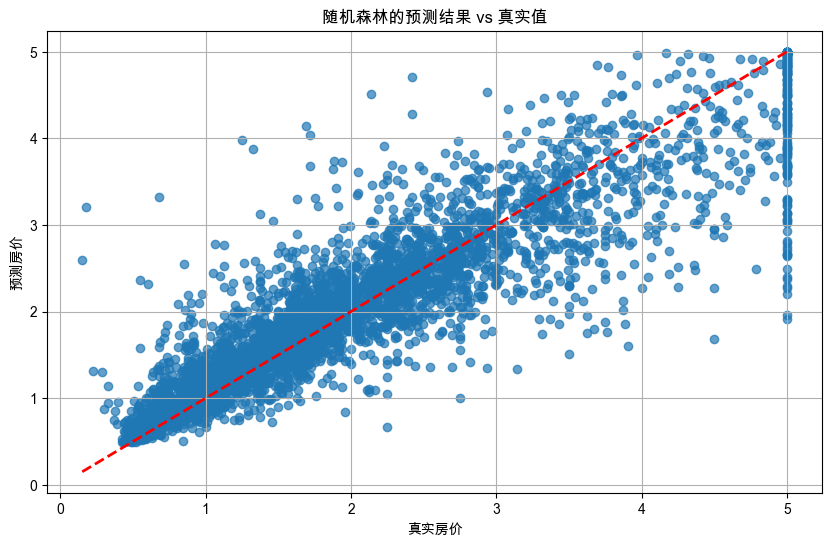

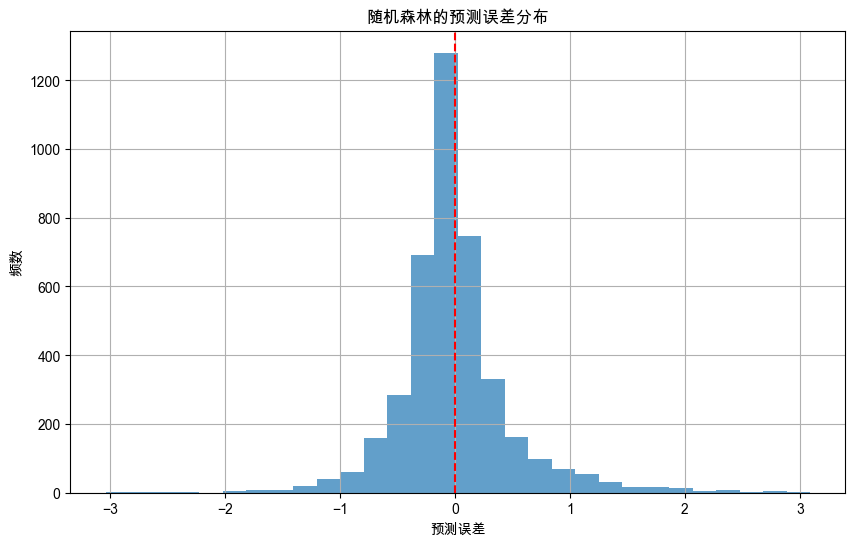

In [65]:
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Heiti TC', 'PingFang HK', 'STHeiti', 'sans-serif']

# 选择测试集R²最高的模型
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
best_model = results[best_model_name]['model']

# 预测
y_pred = best_model.predict(X_test_scaled)

# 可视化预测结果与真实值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('真实房价')
plt.ylabel('预测房价')
plt.title(f'{best_model_name}的预测结果 vs 真实值')
plt.grid(True)
plt.show()

# 可视化预测误差分布
plt.figure(figsize=(10, 6))
errors = y_test - y_pred
plt.hist(errors, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('预测误差')
plt.ylabel('频数')
plt.title(f'{best_model_name}的预测误差分布')
plt.grid(True)
plt.show()